**5. Sobre la imagen microscope.png, aplicar los siguientes pasos:**
1. Binarizar la imagen (si no está binarizada).
2. Obtener la componente conexa de menor tamaño. ¿Cuántos píxeles tiene?
3. Recortar la componente conexa de mayor tamaño, y remover el resto de componentes. Mostrar una imagen binaria donde sólo quede la mayor componente conexa.
4. Aplicar operaciones morfológicas para contar cuántas células hay en total. ¿Comparar el número obtenido contra el número verdadero de células? ¿Son iguales?

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [7]:
# 1. Cargar y binarizar la imagen
image_path = "img/microscope.png"
img = cv2.imread(image_path)

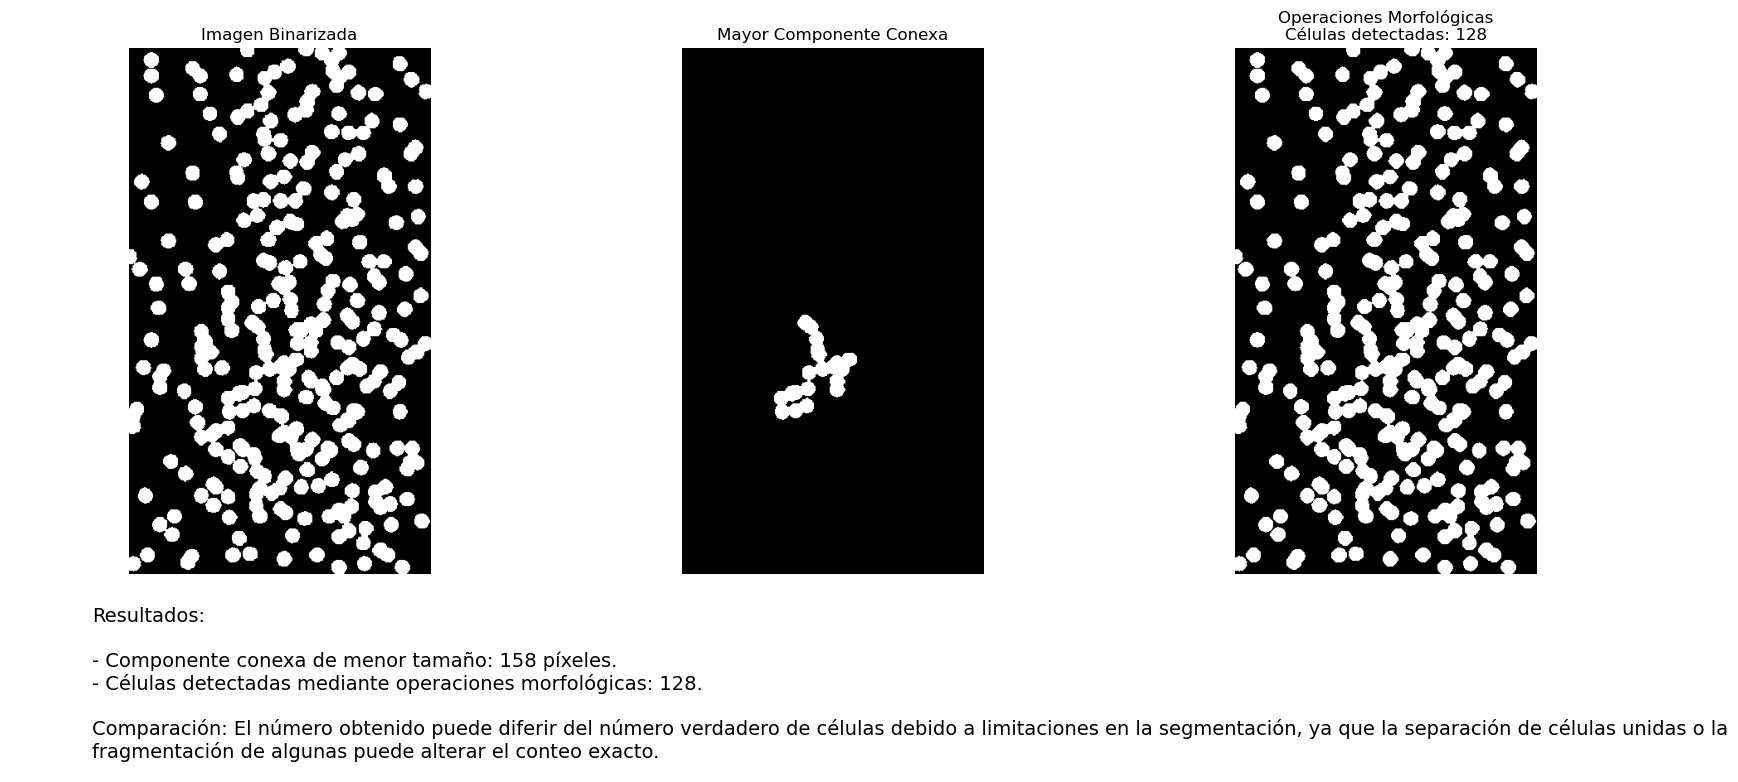

In [8]:
if img is None:
    print("Error al cargar la imagen.")
else:
    # 1. Convertir a escala de grises y binarizar (usando Otsu)
    if len(img.shape) == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img.copy()
    
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # 2. Obtener la componente conexa de menor tamaño
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary, connectivity=8)
    # Excluir el fondo (etiqueta 0)
    areas = stats[1:, cv2.CC_STAT_AREA]
    min_area = np.min(areas)
    
    # 3. Extraer la mayor componente conexa
    max_label = np.argmax(areas) + 1  # se suma 1 al haber excluido el fondo
    largest_component = np.zeros_like(binary)
    largest_component[labels == max_label] = 255
    
    # 4. Aplicar operaciones morfológicas para contar células
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    morph = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
    num_labels_morph, labels_morph, stats_morph, centroids_morph = cv2.connectedComponentsWithStats(morph, connectivity=8)
    num_cells = num_labels_morph - 1  # descontando el fondo
    
    # Crear figura usando gridspec: 1 fila para las imágenes y 1 fila para el texto
    fig = plt.figure(figsize=(18, 8))
    gs = gridspec.GridSpec(2, 3, height_ratios=[3, 1])
    
    # Primer panel: Imagen binarizada
    ax0 = fig.add_subplot(gs[0, 0])
    ax0.imshow(binary, cmap='gray')
    ax0.set_title("Imagen Binarizada")
    ax0.axis("off")
    
    # Segundo panel: Mayor componente conexa
    ax1 = fig.add_subplot(gs[0, 1])
    ax1.imshow(largest_component, cmap='gray')
    ax1.set_title("Mayor Componente Conexa")
    ax1.axis("off")
    
    # Tercer panel: Operaciones morfológicas (conteo de células)
    ax2 = fig.add_subplot(gs[0, 2])
    ax2.imshow(morph, cmap='gray')
    ax2.set_title(f"Operaciones Morfológicas\nCélulas detectadas: {num_cells}")
    ax2.axis("off")
    
    # Panel de texto: abarca todas las columnas de la segunda fila
    ax_text = fig.add_subplot(gs[1, :])
    ax_text.axis("off")
    texto_resultados = (
        f"Resultados:\n\n"
        f"- Componente conexa de menor tamaño: {min_area} píxeles.\n"
        f"- Células detectadas mediante operaciones morfológicas: {num_cells}.\n\n"
        "Comparación: El número obtenido puede diferir del número verdadero de células debido "
        "a limitaciones en la segmentación, ya que la separación de células unidas o la fragmentación "
        "de algunas puede alterar el conteo exacto."
    )
    ax_text.text(0.05, 0.5, texto_resultados, fontsize=14, va='center', wrap=True)
    
    plt.tight_layout()
    plt.show()

**Binarización de la imagen:**

Se binarizó la imagen (utilizando Otsu) para obtener una imagen en blanco y negro que distinga claramente entre el fondo y las células.

**Componente conexa de menor tamaño:**

Al etiquetar las componentes conexas, se identificó aquella con el menor número de píxeles; su área se obtiene de los stats y se muestra en píxeles (por ejemplo, "La componente conexa de menor tamaño tiene: X píxeles").

**Recortar la mayor componente conexa:**

Se extrajo la componente conexa con mayor área y se creó una imagen binaria en la que solo aparece esta componente, eliminando el resto de las regiones.

**Conteo de células con operaciones morfológicas:**

Aplicando una apertura (morfología) se logró separar las células que estuvieran fusionadas. Luego se contó el número de componentes conexas resultantes. En general, el número obtenido mediante estas operaciones puede diferir del número verdadero de células, ya que el proceso morfológico puede fusionar células adyacentes o fragmentar algunas, afectando el conteo exacto.